#### Libraries

In [3]:
                                    ####### VISUALIZATION TOOLS #######

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colormaps as cm
import matplotlib.patches as mpatches 
from matplotlib.patches import Patch

import seaborn as sns
import warnings #ignore the errors for newer version of distplot
warnings.filterwarnings("ignore", category=UserWarning) 

import plotly.express as px
import plotly.graph_objects as go

import folium
from folium import plugins
from folium import Choropleth


                                    ####### VECTORS AND MATRICES #######

import numpy as np
import pandas as pd

                                    ####### SCIPY #######

from scipy import stats

                                    ####### SCIKIT-LEARN #######

from sklearn.preprocessing import StandardScaler #for Z-score normalization
from sklearn.preprocessing import normalize  #normalization along rows
from sklearn.preprocessing import PolynomialFeatures #to do a polynomial regression
from sklearn.preprocessing import OneHotEncoder #one-hot encoding adding columns
from sklearn.preprocessing import LabelEncoder #from strings to label
from sklearn.preprocessing import label_binarize #one-hot encoding of vectors

from sklearn.linear_model import LinearRegression #for linear (parameter) regression
from sklearn.linear_model import Ridge #for Ridge regression
from sklearn.linear_model import Lasso #for Lasso regression
from sklearn.linear_model import LogisticRegression #logistic regression 


from sklearn.tree import DecisionTreeClassifier #for tree classifier (not regression)
from sklearn.tree import DecisionTreeRegressor #for regression tree
from sklearn.tree import plot_tree #to plot the tree

from sklearn.svm import LinearSVC #supported vector machine
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.cluster import KMeans #Kmeans

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error #for MSE error
from sklearn.metrics import r2_score #for the R^2 score on muliple variable regression
from sklearn.metrics import log_loss # for the cross-correlation entropy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score # k-means accuracies
from sklearn.metrics import explained_variance_score #for explained variance

from sklearn.pipeline import Pipeline #to use pipelines

from sklearn.model_selection import train_test_split #train-test splitting
from sklearn.model_selection import cross_val_score #K-fold validation
from sklearn.model_selection import cross_val_predict #K-fold validation
from sklearn.model_selection import StratifiedKFold #K-fold validation
from sklearn.model_selection import GridSearchCV #for GridSearchCV


from sklearn.multiclass import OneVsOneClassifier #multiclass classification using binary classification instead

from sklearn.utils.class_weight import compute_sample_weight

from sklearn.decomposition import PCA

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

import umap.umap_ as UMAP 
from sklearn.manifold import TSNE


from sklearn.datasets import make_blobs 
from sklearn.datasets import make_classification

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
from sklearn.datasets import load_breast_cancer
cancers = load_breast_cancer()
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing


                                    ####### ENSAMBLE METHODS #######

from xgboost import XGBRegressor

                                    ####### PYTORCH #######
import torch
from torch import nn #train neural networks
from torch import optim #optimizer
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset
import torchvision.models as models

                                   ####### IMAGES #######
                                   
import os
from PIL import Image # converting images into arrays
from PIL import ImageFile

from copy import copy
import operator
import sys

                                   ####### SCRAPING #######
import urllib




import gymnasium
from gymnasium.wrappers import RecordVideo
import glob, io, base64
from IPython.display import HTML
from IPython import display as ipythondisplay
import random
import wordcloud
from wordcloud import WordCloud, STOPWORDS

from collections import namedtuple, deque

import time #time of running

# Titanic dataset and preparation

Teh dataset takes this form:

| Variable   |	Definition   |
 |:------|:--------------------------------|
 |survived | survived? 0 = No, 1 = yes  |
 |pclass | Ticket class (int)  |
 |sex	 |sex |
 |age	 | age in years  |
 |sibsp  |	# of siblings / spouses aboard the Titanic |
 |parch  |	# of parents / children aboard the Titanic |
 |fare   |	Passenger fare   |
 |embarked | Port of Embarkation |
 |class  |Ticket class (obj)   |
 |who    | man, woman, or child  |
 |adult_male | True/False |
 |alive  | yes/no  |
 |alone  | yes/no  |

In [12]:
df = sns.load_dataset('titanic')
print('This dataset has',titanic.shape[0],'rows and',titanic.shape[1],'columns')
df.head()

This dataset has 891 rows and 15 columns


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Detecting missing values and drop columns

We can give a first look to the missing values:

In [13]:
df.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [26]:
def NaN_value_finder(dataframe):
    dataframe=dataframe.replace('?',np.nan)
    missing_data = dataframe.isnull()
    missing_dict=dict()
    missing_index=list()
    for column in missing_data.columns.values.tolist():
        for i,value in enumerate(missing_data[column]):
            if missing_data[column][i]==True:
                missing_index.append(i)
                missing_dict[column]=missing_dict.get(column,0)+1
    for i,value in enumerate(missing_dict):
        print('There are', missing_dict[value], 'out of',dataframe.shape[0],
              'null values in the column',value,'(',np.round((missing_dict[value]/dataframe.shape[0])*100,2).item(),'%)')
    return missing_dict, missing_index


missing_dict, missing_index = NaN_value_finder(df)

There are 177 out of 891 null values in the column age ( 19.87 %)
There are 2 out of 891 null values in the column embarked ( 0.22 %)
There are 688 out of 891 null values in the column deck ( 77.22 %)
There are 2 out of 891 null values in the column embark_town ( 0.22 %)


Let's ignore all this features **but 'age'** and also the 'alive' column:

In [ ]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male', 'alone']
target = 'survived'

X = df[features]
y = df[target]

Balancing of classes, to see if use the stratify in train-test and cross validation:

In [30]:
y.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

## Dealing with remaining missing values and normalization

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train.shape

(712, 10)

In [90]:
def binary_multi(df):
    binary=[]
    multi=[]

    for i,column in enumerate(df.columns):
        if df[column].nunique()== 2 and (df[column].dtype=='object' or df[column].dtype=='category' or df[column].dtype=='bool'):
            binary.append(column)
        if df[column].nunique()> 2 and df[column].nunique()<= 40 and (df[column].dtype=='object' or df[column].dtype=='category'):
            multi.append(column)

    print('Binary features are:',binary,';')
    print('Multiclass features are:',multi,'.\n')

    for i,column in enumerate(multi):
        print(column,'has',df[column].nunique(),'classes')

binary_multi(X)

Binary features are: ['sex', 'adult_male', 'alone'] ;
Multiclass features are: ['class', 'who'] .

class has 3 classes
who has 3 classes


Since X has 10 columns, and since ['class', 'who'] are multi with 3 and 3, the one-hot encoding (without drop first) will give us: 

$10-5 + 3*2 (binary)+ 2*3(multi) = 17$ columns

In [ ]:
numerical_columns = X_train.select_dtypes(include=['number']).columns.tolist() #could have also used X_test, it's just for the column names
categorical_columns = X_train.select_dtypes(include=['object', 'category','bool']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # NaN values sobstituted with the median
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # NaN values sobstituted with the most frequent data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [104]:
pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())

,num__pclass,num__age,num__sibsp,num__parch,num__fare,cat__sex_female,cat__sex_male,cat__class_First,cat__class_Second,cat__class_Third,cat__who_child,cat__who_man,cat__who_woman,cat__adult_male_False,cat__adult_male_True,cat__alone_False,cat__alone_True
0,0.829568,-0.081135,-0.465084,-0.466183,0.513812,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.370945,-0.081135,-0.465084,-0.466183,-0.662563,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,-1.571457,-0.081135,-0.465084,-0.466183,3.955399,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.829568,-0.887827,-0.465084,0.727782,-0.467874,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-0.370945,0.110934,0.478335,0.727782,-0.115977,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.829568,-0.081135,-0.465084,-0.466183,-0.498500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
708,-1.571457,0.418245,-0.465084,-0.466183,10.005329,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
709,0.829568,1.417007,0.478335,3.115713,0.053205,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
710,-1.571457,1.340179,-0.465084,-0.466183,0.139097,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


# Model 1: Random Forest

In [155]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True)

model = GridSearchCV(estimator=pipe,
                    param_grid=param_grid, 
                    cv=cv, 
                    scoring='accuracy', 
                    verbose=0)

model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score:.2%}")


Test set accuracy: 80.45%


## Confusion matrix

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



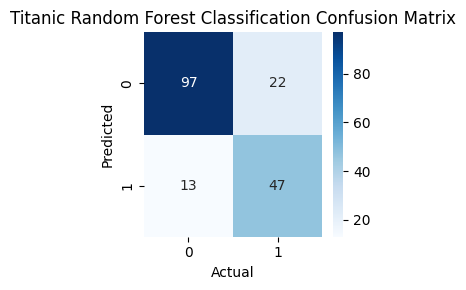

In [156]:
yhat_test = model.predict(X_test)
print(classification_report(y_test, yhat_test))

conf_matrix = confusion_matrix(yhat_test,y_test) #will be (rows,columns)

plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Titanic Random Forest Classification Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()
plt.close()

## Feature importances

we have to trace back the names:

In [ ]:
#model.best_estimator_['preprocessor'].get_feature_names_out()==preprocessor.get_feature_names_out()

categorical_ohencoded_names=model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_columns)

categorical_ohencoded_names=categorical_ohencoded_names.tolist()

ohe_column_names = numerical_columns+categorical_ohencoded_names #17 names, as expected

now compute the feature importances and make a plot:

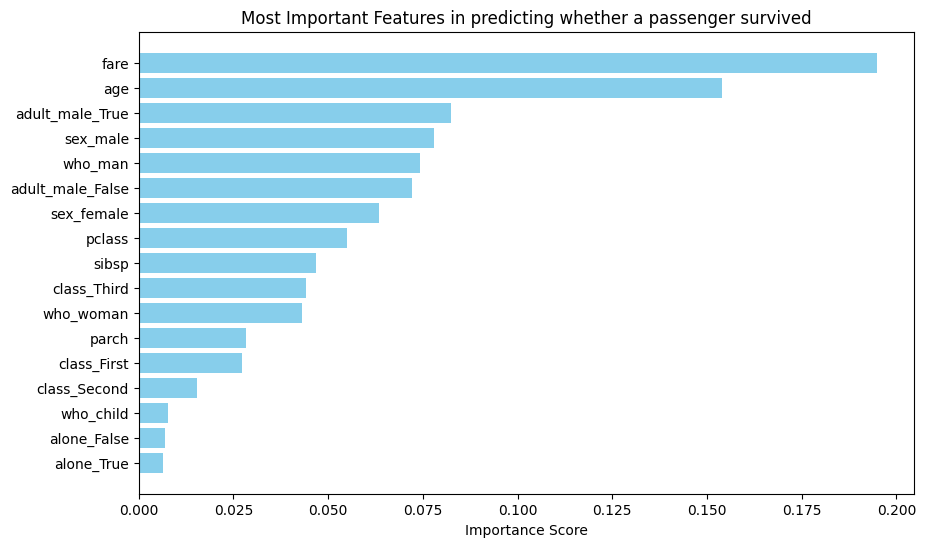

In [142]:
feature_importances = model.best_estimator_['classifier'].feature_importances_

importance_df = pd.DataFrame({'Feature': ohe_column_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis() 
plt.title('Most Important Features in predicting whether a passenger survived')
plt.xlabel('Importance Score')
plt.show()

In [150]:
X.select_dtypes('number').corr()

,pclass,age,sibsp,parch,fare
pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,-0.549500,0.096067,0.159651,0.216225,1.000000


# Model 2: Logistic regression

We now try a different model, but instead of redefining everything, we **update** the pipeline in a simple way:


Test set accuracy: 83.24%
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.81      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



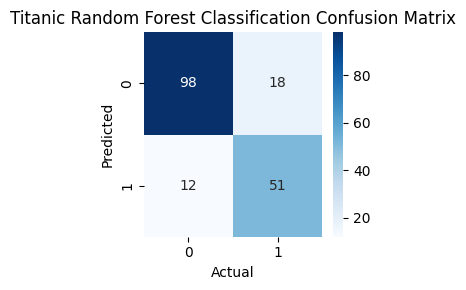

In [157]:
pipe.set_params(classifier=LogisticRegression(random_state=42))
model.estimator = pipe

new_param_grid = {
    'classifier__solver' : ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight' : [None, 'balanced']
}

model.param_grid = new_param_grid

model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score:.2%}")

yhat_test = model.predict(X_test)
print(classification_report(y_test, yhat_test))


conf_matrix = confusion_matrix(yhat_test,y_test) #will be (rows,columns)

plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Titanic Random Forest Classification Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()
plt.close()

## Feature importances

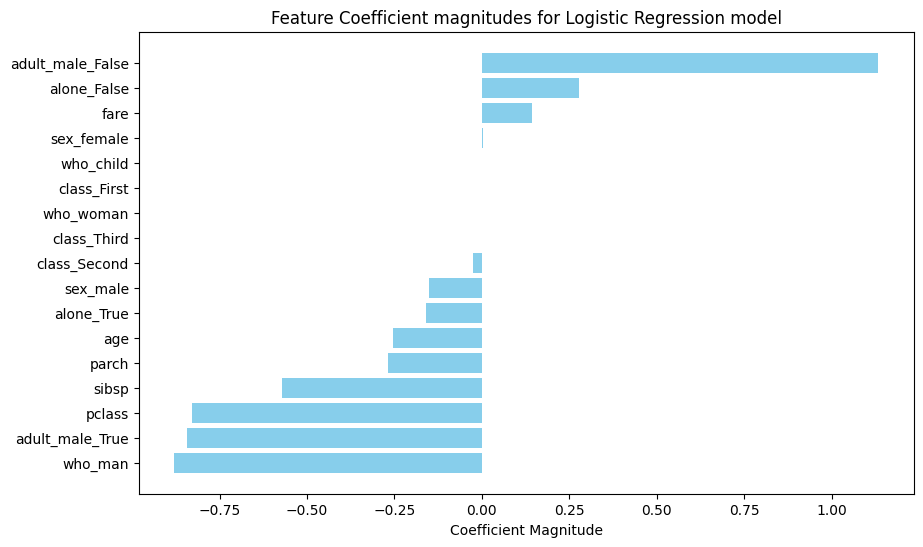

In [162]:
coefficients = model.best_estimator_.named_steps['classifier'].coef_[0]

categorical_ohencoded_names=model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_columns)
categorical_ohencoded_names=categorical_ohencoded_names.tolist()

ohe_column_names = numerical_columns+categorical_ohencoded_names #17 names, as expected

importance_df = pd.DataFrame({'Feature': ohe_column_names,
                              'Coefficient': coefficients
                             }).sort_values(by='Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.gca().invert_yaxis() 
plt.title('Feature Coefficient magnitudes for Logistic Regression model')
plt.xlabel('Coefficient Magnitude')
plt.show()
